# Lab 2: Data Loading, Cleaning, and Exploration

In this lab, we will cover the following topics:
1. Data loading and cleaning
2. Handling missing data
3. Feature engineering examples
4. Visualizations/data exploration

Each section includes basic implementation and questions for further exploration.

## 1. Data Loading and Cleaning

We will start by loading and cleaning a dataset. We will also explore different techniques for data cleaning.

In [15]:
import functionals as f
import pandas as pd
import numpy as np

# Load the dataset
path_to_file = 'messy_data.csv'
data = pd.read_csv(path_to_file)

# Display dataset information
# data.head()

# data.describe()

# drop the deck column because it's missing too many rows
data.drop(['deck','embarked'], axis=1, inplace=True)

data.info()

# Run the simple model
f.simple_model(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158 entries, 0 to 1157
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     1158 non-null   int64  
 1   pclass       1051 non-null   float64
 2   embark_town  1155 non-null   object 
 3   sex          1158 non-null   object 
 4   adult_male   1158 non-null   bool   
 5   who          1158 non-null   object 
 6   wspd         929 non-null    float64
 7   lfwa         929 non-null    float64
 8   class        1158 non-null   object 
 9   tprc         1158 non-null   float64
 10  sibsp        1044 non-null   float64
 11  age          829 non-null    float64
 12  alone        1158 non-null   bool   
 13  fare         1036 non-null   float64
 14  parch        1042 non-null   float64
dtypes: bool(2), float64(8), int64(1), object(4)
memory usage: 120.0+ KB
Accuracy: 0.8256880733944955


/Users/caryngeady/Documents/GitHub/BINF-5507-Winter-2026/.pixi/envs/default/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


## Data Cleaning

We will clean the dataset by removing duplicates, fixing inconsistent entries and removing outliers.

In [19]:
data.corr(numeric_only=True)


,survived,pclass,adult_male,wspd,lfwa,tprc,sibsp,age,alone,fare,parch
survived,1.000000,-0.384606,-0.594903,0.024842,-0.028179,0.306199,-0.010276,-0.028179,-0.227353,0.306199,0.112813
pclass,-0.384606,1.000000,0.148874,-0.069477,-0.393692,-0.563433,0.015780,-0.393692,0.237880,-0.563433,-0.007115
adult_male,-0.594903,0.148874,1.000000,0.005767,0.198260,-0.241918,-0.290963,0.198260,0.380345,-0.241918,-0.374042
wspd,0.024842,-0.069477,0.005767,1.000000,0.109827,-0.026147,-0.086049,0.109827,0.041254,-0.026147,-0.044043
lfwa,-0.028179,-0.393692,0.198260,0.109827,1.000000,0.126083,-0.225322,1.000000,0.099078,0.126083,-0.183751
tprc,0.306199,-0.563433,-0.241918,-0.026147,0.126083,1.000000,0.144333,0.126083,-0.269233,1.000000,0.190357
sibsp,-0.010276,0.015780,-0.290963,-0.086049,-0.225322,0.144333,1.000000,-0.225322,-0.646248,0.144333,0.397755
age,-0.028179,-0.393692,0.198260,0.109827,1.000000,0.126083,-0.225322,1.000000,0.099078,0.126083,-0.183751
alone,-0.227353,0.237880,0.380345,0.041254,0.099078,-0.269233,-0.646248,0.099078,1.000000,-0.269233,-0.541653
fare,0.306199,-0.563433,-0.241918,-0.026147,0.126083,1.000000,0.144333,0.126083,-0.269233,1.000000,0.190357


In [4]:
# Remove duplicates
data_no_duplicates = data.copy().drop_duplicates()

# Fix inconsistent entries
data_format_fixed = data_no_duplicates.copy()
data_format_fixed['sex'] = data_format_fixed['sex'].apply(lambda x: 'female' if 'F' in x or 'f' in x else 'male')

# Check for outliers - if they exist, remove them
# <insert code here>

# Dataset with no duplicates, fixed format, missing values and outlier removed (if they exist)
# <insert code here>


### Questions for Exploration

1. How does the following affect model performance?
    * removing duplicates
    * fixing inconsistencies  
2. What other inconsistencies can you find and fix in the dataset?
3. How does the choice of dataset affect the data cleaning process?

## 2. Handling Missing Data

We will handle missing data by using different techniques such as imputation and deletion. We will also explore the impact of these techniques on the dataset.

In [ ]:
# Identify missing values
missing_data = data.isnull().sum()
print(missing_data)

# Impute missing values
numerical_col_name = []
categorical_col_name = []
data['age'].fillna(data['age'].mean(), inplace=True)
data['embark_town'].fillna(data['embark_town'].mode()[0], inplace=True)

# Drop rows with missing values
data.dropna(inplace=True)

# Display the dataset after handling missing data
data.head()
f.simple_model(data) # we have data leakage because we imputed on the full dataset


survived         0
pclass         107
embark_town      3
sex              0
adult_male       0
who              0
wspd           229
lfwa           229
class            0
tprc             0
sibsp          114
age              0
alone            0
fare           122
parch          116
dtype: int64
Accuracy: 0.7950819672131147


/var/folders/k9/vcw_mvv16nxc8ncjdxnvv5fm0000gn/T/ipykernel_95818/947501866.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].mean(), inplace=True)
/var/folders/k9/vcw_mvv16nxc8ncjdxnvv5fm0000gn/T/ipykernel_95818/947501866.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

### Questions for Exploration

1. How does the following affect model performance:
    * imputation 
    * dropping rows with missing values
2. What happens to the model performance if you use different imputation techniques (e.g., median, mode)?
3. How does the choice of dataset affect the handling of missing data?

## 3. Feature Engineering Examples

Next, we will create new features from the existing ones. We will also explore different techniques for feature engineering.

In [20]:
# Create new features
data_new_features = data.copy()
data_new_features['family_size'] = data_new_features['sibsp'] + data_new_features['parch'] + 1
data_new_features['is_alone'] = (data_new_features['family_size'] == 1).astype(int)

# Any other features you can think of?
f.simple_model(data_new_features)
# Scale the numerical features
# <insert code here>

Accuracy: 0.8256880733944955


/Users/caryngeady/Documents/GitHub/BINF-5507-Winter-2026/.pixi/envs/default/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


### Questions for Exploration

1. How do the new features affect model performance?
2. What other features can you create from the existing ones?
3. How does feature scaling (e.g., standardization, normalization) affect model performance? (Keep in mind that the data should be scaled **after** data splitting; this will require modifying the simple_model method in functionals.)

## 4. Visualizations/Data Exploration

We will visualize and explore the dataset using different techniques. We will also explore the impact of these visualizations on data interpretation.

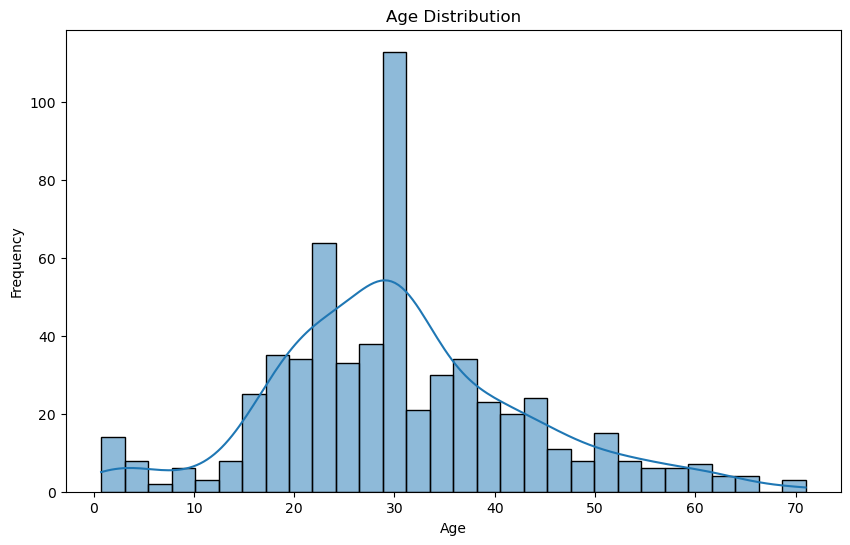

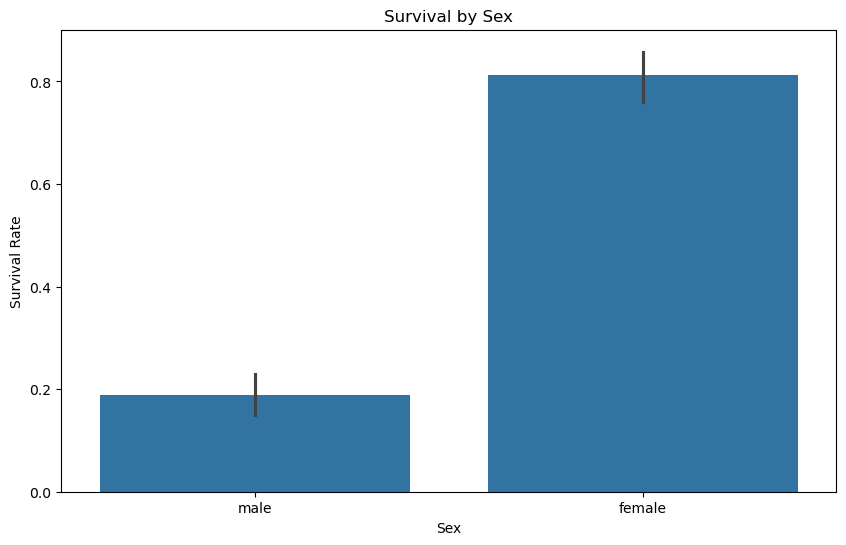

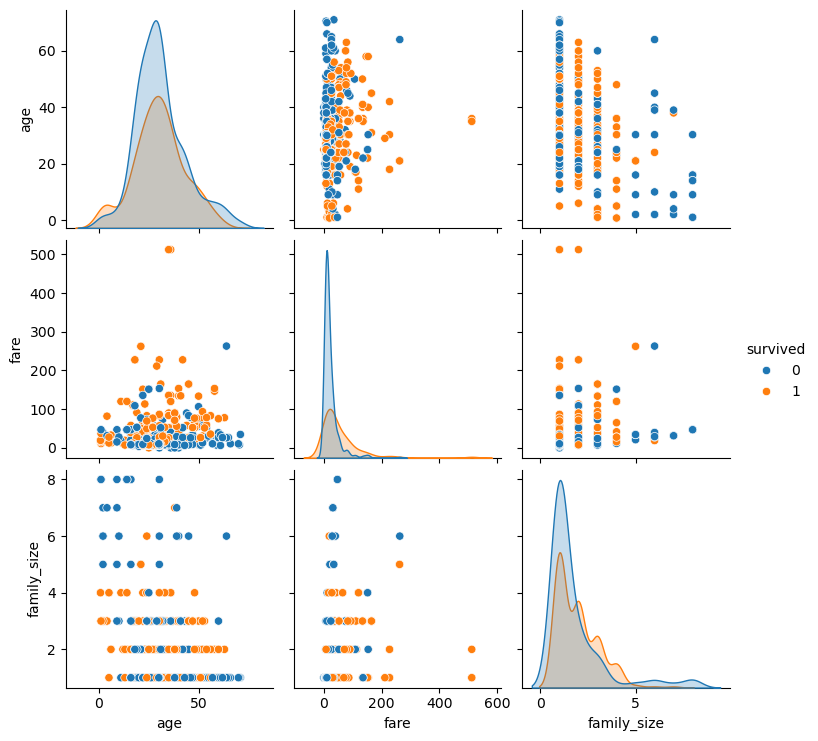

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of age
plt.figure(figsize=(10, 6))
sns.histplot(data_new_features['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Bar plot of survival by sex
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='survived', data=data_new_features)
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

# Pair plot of numerical features
sns.pairplot(data_new_features[['age', 'fare', 'family_size', 'survived']], hue='survived')
plt.show()


### Questions for Exploration

1. How do the visualizations help in understanding the dataset?
2. What other visualizations can you create to explore the dataset?
3. How does the choice of visualization technique affect the interpretation of the data?

## Extensions

Explore other data preprocessing techniques such as:
- Encoding categorical variables (e.g., one-hot encoding, label encoding) - i.e., if you modify the simple_model method to only include numerical features, omitting the categorical variables
- Feature selection techniques (i.e., assessing inter-feature correlation and removing )

Compare their impact on the dataset and the performance of downstream machine learning models. 
Can you identify any sources of bias in the dataset?